In this Dojo we will work with the Titanic data set and predict the survivors
.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
path = 'https://raw.githubusercontent.com/DaPlayfulQueen/DE_track_data/master/train.csv'

In [ ]:
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.drop(columns=['Cabin'], inplace=True)

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Explore the data

How many data points do we have here?

What is the format of the data points

How many labels do we have?

What is the format of the labels?

What else would you like to know?

# Preprocessing



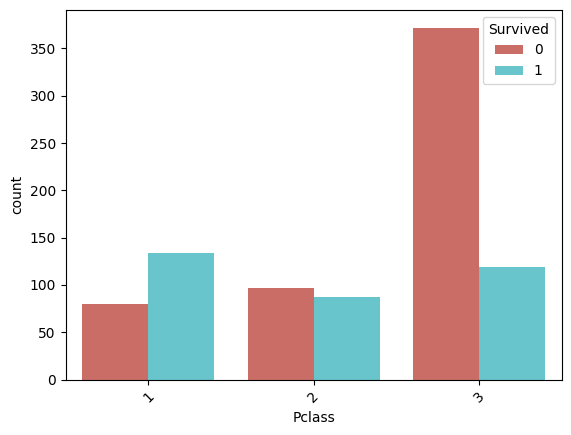

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()


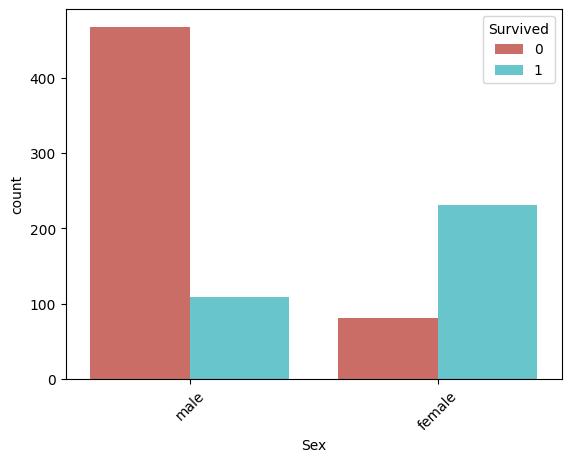

In [ ]:
sns.countplot(x='Sex', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

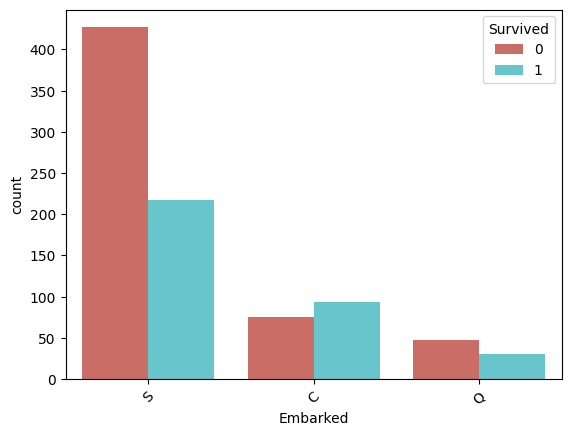

In [ ]:
sns.countplot(x='Embarked', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

Encode Categorical Variables
We need to convert all categorical variables into numeric format. The categorical variables we will be keeping are Embarked, Sex and Title.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


drop the variables we won't be using 'Cabin', 'Name', 'Ticket', 'PassengerId'

In [ ]:
cat_fields=['Embarked','Sex']
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
# Encode columns into a numpy array
col_encoded = one_hot_encoder.fit_transform(df[cat_fields])

In [ ]:
col_encoded.shape

(891, 5)

In [ ]:
one_hot_encoder.get_feature_names_out()

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male'],
      dtype=object)

In [ ]:
col_encoded.shape

(891, 5)

In [ ]:
col_encoded

<891x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1782 stored elements in Compressed Sparse Row format>

In [ ]:
one_hot_encoder.get_feature_names_out().tolist()

['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male']

In [ ]:
df_encoded_columns = pd.DataFrame(data=col_encoded.toarray(),columns=one_hot_encoder.get_feature_names_out().tolist())

In [ ]:
df_encoded_columns

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...
886,0.0,0.0,1.0,0.0,1.0
887,0.0,0.0,1.0,1.0,0.0
888,0.0,0.0,1.0,1.0,0.0
889,1.0,0.0,0.0,0.0,1.0


In [ ]:
df = df.join(df_encoded_columns.set_axis(df.index))

In [ ]:
df

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,NaN,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,0.0,0.0,1.0,0.0,1.0
1,38.0,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1.0,0.0,0.0,1.0,0.0
2,26.0,NaN,S,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0.0,0.0,1.0,1.0,0.0
3,35.0,C123,S,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,0.0,0.0,1.0,1.0,0.0
4,35.0,NaN,S,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,0,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,Rev,0.0,0.0,1.0,0.0,1.0
887,19.0,B42,S,0,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,Miss,0.0,0.0,1.0,1.0,0.0
888,22.0,NaN,S,3,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,Miss,0.0,0.0,1.0,1.0,0.0
889,26.0,C148,C,0,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,Mr,1.0,0.0,0.0,0.0,1.0


In [ ]:
df.drop(columns=['Sex','Embarked'],inplace=True)

In [ ]:
df

,Age,Cabin,Family_Size,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Title,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,NaN,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,0.0,A/5 21171,Mr,0.0,0.0,1.0,0.0,1.0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1.0,PC 17599,Mrs,1.0,0.0,0.0,1.0,0.0
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,1.0,STON/O2. 3101282,Miss,0.0,0.0,1.0,1.0,0.0
3,35.0,C123,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1.0,113803,Mrs,0.0,0.0,1.0,1.0,0.0
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0.0,373450,Mr,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,0,13.0000,"Montvila, Rev. Juozas",0,887,2,0,0.0,211536,Rev,0.0,0.0,1.0,0.0,1.0
887,19.0,B42,0,30.0000,"Graham, Miss. Margaret Edith",0,888,1,0,1.0,112053,Miss,0.0,0.0,1.0,1.0,0.0
888,22.0,NaN,3,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,1,0.0,W./C. 6607,Miss,0.0,0.0,1.0,1.0,0.0
889,26.0,C148,0,30.0000,"Behr, Mr. Karl Howell",0,890,1,0,1.0,111369,Mr,1.0,0.0,0.0,0.0,1.0


Scale Continuous Variables
The continuous variables need to be scaled. This is done using a standard scaler from SkLearn.

In [ ]:
df.isna().sum()

Age              0
Cabin          687
Family_Size      0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
SibSp            0
Survived         0
Ticket           0
Title            0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Sex_female       0
Sex_male         0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler =StandardScaler()
X = df.drop(columns =['Survived', 'Ticket', 'Name', 'PassengerId', 'Cabin', 'Title'])
y=df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#copie of x_train_data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[['Age', 'Fare']] = standard_scaler.fit_transform(X_train[['Age', 'Fare']]) #double breakets for filtering in pandas
X_test_scaled[['Age', 'Fare']] = standard_scaler.transform(X_test[['Age', 'Fare']])

# Neural Network¶
Now, all that is left is to feed our data that has been cleaned, encoded and scaled to our neural network.

But first, we need to separate data_df back into train and test sets.

In [ ]:
X_train_scaled_to_numpy = X_train_scaled.to_numpy()

In [ ]:
X_train_scaled_to_numpy.shape

(712, 11)

In [ ]:
X_train_scaled_to_numpy

array([[ 1.22680334,  0.        , -0.07868358, ...,  1.        ,
         0.        ,  1.        ],
       [-0.4805302 ,  0.        , -0.37714494, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.20240322,  0.        , -0.47486697, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.88533664,  2.        , -0.35580399, ...,  1.        ,
         0.        ,  1.        ],
       [-1.16346361,  3.        ,  1.68320121, ...,  1.        ,
         1.        ,  0.        ],
       [-0.63229318,  1.        ,  0.86074761, ...,  1.        ,
         0.        ,  1.        ]])

In [ ]:
X_test_scaled_to_numpy = X_test_scaled.to_numpy()

In [ ]:
X_test_scaled_to_numpy.shape

(179, 11)

In [ ]:
X_test_scaled_to_numpy

array([[-1.92227852,  2.        , -0.33390078, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.12652173,  0.        , -0.42528387, ...,  1.        ,
         0.        ,  1.        ],
       [-0.70817467,  0.        , -0.47486697, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.65769216,  6.        , -0.02308312, ...,  1.        ,
         1.        ,  0.        ],
       [-0.93581914,  0.        , -0.42528387, ...,  1.        ,
         1.        ,  0.        ],
       [-1.92227852,  2.        , -0.30589933, ...,  1.        ,
         1.        ,  0.        ]])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)


(712, 11)
(179, 11)


In [ ]:
print(df['Survived'].value_counts())

0.0    549
1.0    342
Name: Survived, dtype: int64


Define a function buil_model that builds the model and complies it and uses an Early Stopping Callback



In [ ]:
from keras.models import Sequential

def create_model():
  model = Sequential()
  model.add(layers.Dense(128, activation = 'relu', input_dim=(X_train_scaled.shape[1])))
  model.add(layers.Dense(1, activation ='sigmoid'))
  model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])
  return model



Train model
At this stage, we have our model. We have chosen a few hyperparameters such as the number of hidden layers, the number of neurons and the activation function.

The next step is to train the model on our training set. This step also requires us to choose a few more hyperparameters such as the loss function, the optimization algorithm, the number of epochs and the batch size.

In [ ]:
model = create_model()

Access scores and plot the train and validation loss and accuracy

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
cb = EarlyStopping(monitor='val_loss', min_delta=0.01, verbose=0, patience=3, restore_best_weights=True)
epochs = 20
batch_size = 32
history = model.fit(X_train_scaled_to_numpy.astype('float32'), y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_scaled_to_numpy.astype('float32'), y_test), callbacks=cb)


Epoch 1/20
23/23 [==============================] - 7s 16ms/step - loss: 0.6192 - accuracy: 0.6699 - auc: 0.7041 - val_loss: 0.5821 - val_accuracy: 0.6592 - val_auc: 0.8651
Epoch 2/20
23/23 [==============================] - 0s 6ms/step - loss: 0.5518 - accuracy: 0.7051 - auc: 0.8329 - val_loss: 0.5219 - val_accuracy: 0.7430 - val_auc: 0.8741
Epoch 3/20
23/23 [==============================] - 0s 6ms/step - loss: 0.5116 - accuracy: 0.7556 - auc: 0.8422 - val_loss: 0.4859 - val_accuracy: 0.7821 - val_auc: 0.8805
Epoch 4/20
23/23 [==============================] - 0s 6ms/step - loss: 0.4830 - accuracy: 0.7865 - auc: 0.8474 - val_loss: 0.4582 - val_accuracy: 0.8101 - val_auc: 0.8887
Epoch 5/20
23/23 [==============================] - 0s 6ms/step - loss: 0.4645 - accuracy: 0.7963 - auc: 0.8552 - val_loss: 0.4452 - val_accuracy: 0.7989 - val_auc: 0.8870
Epoch 6/20
23/23 [==============================] - 0s 6ms/step - loss: 0.4538 - accuracy: 0.7978 - auc: 0.8549 - val_loss: 0.4343 - val_ac

In [ ]:
history2 = history

In [ ]:
def show_history(story):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14, 5.5)
    plt.suptitle('NN Training')

    ax1.plot(story.history['accuracy'])
    ax1.plot(story.history['val_accuracy'])
    ax1.set(xlabel='Epoche') #, ylabel='Accuracy')
    ax1.legend(['train_accuracy', 'test_accuracy'], loc='lower right')
    ax1.set_title('Accuracy')

    ax2.plot(story.history['loss'])
    ax2.plot(story.history['val_loss'])
    ax2.set(xlabel='Epoche') #, ylabel='Loss')
    ax2.legend(['train_loss', 'test_loss'], loc='best')
    ax2.set_title('Loss')

    plt.show()

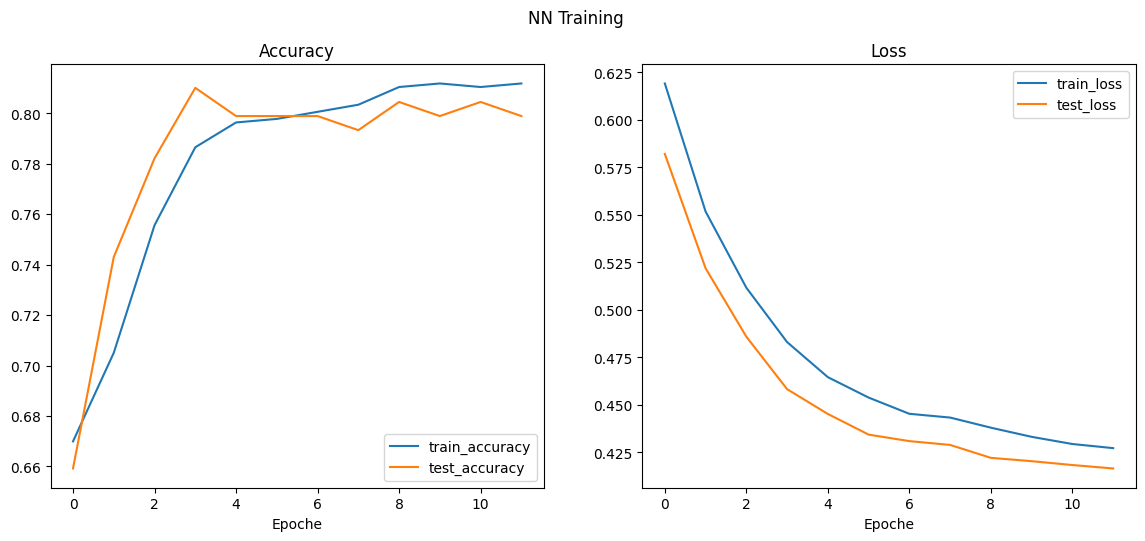

In [ ]:
show_history(history)

# Tune the Hyperparameters using either GridSearch OR Keras Tuner
(Hidden Units, Layers, Dropout Rate if Dropout is used, Optimizers etc.)

In [ ]:
pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 4.0 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch

<ipython-input-43-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


# Make Predictions on Test Set and Plot the COnfusion Matrix

make the predictions of best model

In [ ]:
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model = keras.Sequential()
    #hp.int specifies its an integer number, you say min, max and a step size, first value it will check is 32, then 160 etc.
    # you can vary activation function as well
    model.add(layers.Dense(units = hp.Int('units',
                                        min_value = 32,
                                        max_value = 512,
                                        step = 128),
                           activation='relu'))
    # Alternatively instead of using hp.Int, you could use hp.Choice:
    #model.add(layers.Dense(units = hp.Choice('units',[32,160]),
     #                      activation= hp.Choice('activation',['relu','tanh'])))

    model.add(layers.Dense(1, activation='sigmoid'))

    # hp.choice when you want to try different choices
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
                  # or hp.Float('learning_rate',
                  #                      min_value = 0.0001
                  #                      max_value = 0.1,
                  #                      step = 0.001) for learning rate or dropout
        loss='binary_crossentropy',
        metrics=['accuracy','AUC'])
    return model

In [ ]:
from keras_tuner import Objective
obj = Objective('val_auc', 'max')
tuner = RandomSearch(
    #provide it the build_model function
    build_model,
    #The objective is the function to optimize.
    #The tuner infers if it is a maximization or a minimization problem based on its value.
    objective=obj,
    #max_trials represents the number of hyperparameter combinations that will be tested by the tuner,
    #max number of trials = model config to test at most
    #while execution_per_trial is the number of models that should be built and fit for each trial for robustness purposes.
    max_trials=5,
    # in each trial will do 5 different models
    # the number of models that should be built and fit for each trial
    # the higher number of trials the better, but depends on your time and resources
    executions_per_trial=2,
    directory='my_dir',
    project_name='titanic3')

In [ ]:
y_train_to_numpy = np.asarray(y_train)

In [ ]:
tuner.search(X_train_scaled_to_numpy,y_train_to_numpy, epochs=7, validation_split=0.2)

Trial 5 Complete [00h 00m 04s]
val_auc: 0.8862903118133545

Best val_auc So Far: 0.8862903118133545
Total elapsed time: 00h 00m 35s


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/titanic3
Showing 10 best trials
Objective(name="val_auc", direction="max")

Trial 4 summary
Hyperparameters:
units: 160
learning_rate: 0.01
Score: 0.8862903118133545

Trial 0 summary
Hyperparameters:
units: 416
learning_rate: 0.01
Score: 0.8847311735153198

Trial 1 summary
Hyperparameters:
units: 288
learning_rate: 0.001
Score: 0.8801612854003906

Trial 3 summary
Hyperparameters:
units: 288
learning_rate: 0.0001
Score: 0.8644623756408691

Trial 2 summary
Hyperparameters:
units: 32
learning_rate: 0.0001
Score: 0.4380107522010803


In [ ]:
best_model=tuner.get_best_models()[0]

In [ ]:
best_model

In [ ]:
best_model.evaluate(X_test_scaled,y_test)

6/6 [==============================] - 1s 12ms/step - loss: 0.4199 - accuracy: 0.8380 - auc: 0.8899


[0.4199012517929077, 0.8379888534545898, 0.8898969888687134]

In [ ]:
predictions = best_model.predict(X_test_scaled)

6/6 [==============================] - 0s 3ms/step


In [ ]:
predictions

array([[0.6979558 ],
       [0.13966778],
       [0.11446767],
       [0.85205454],
       [0.5965639 ],
       [0.9747011 ],
       [0.6280635 ],
       [0.0817938 ],
       [0.59357697],
       [0.84412986],
       [0.20516545],
       [0.06224946],
       [0.10973126],
       [0.12712528],
       [0.1263999 ],
       [0.88697267],
       [0.20020974],
       [0.62841004],
       [0.15398692],
       [0.24443175],
       [0.10712142],
       [0.21981564],
       [0.38543567],
       [0.1160866 ],
       [0.10416376],
       [0.04244226],
       [0.18118457],
       [0.14379731],
       [0.07662825],
       [0.5366655 ],
       [0.11735769],
       [0.4853828 ],
       [0.33456796],
       [0.48463583],
       [0.12231918],
       [0.10580957],
       [0.2778905 ],
       [0.6280635 ],
       [0.9565845 ],
       [0.09610992],
       [0.15890692],
       [0.06797523],
       [0.09629143],
       [0.05195633],
       [0.64607894],
       [0.12613477],
       [0.11766398],
       [0.110

In [ ]:
predictions_c =  predictions >= 0.9

In [ ]:
predictions_c.astype(int)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions_c.astype(int))

array([[103,   2],
       [ 53,  21]])